# Data Mining

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project/TopCV Job Salary/tidy_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14067 entries, 0 to 14066
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          14067 non-null  object 
 1   category_type     14067 non-null  object 
 2   job_address       14067 non-null  object 
 3   Longitude         14067 non-null  float64
 4   Latitude          14067 non-null  float64
 5   city              14066 non-null  object 
 6   district          12999 non-null  object 
 7   suburb            11883 non-null  object 
 8   job_id            14067 non-null  int64  
 9   job_name          14067 non-null  object 
 10  working_form      14067 non-null  object 
 11  level             14067 non-null  object 
 12  gender            14067 non-null  object 
 13  exp               14067 non-null  float64
 14  degree            14067 non-null  object 
 15  language          14067 non-null  object 
 16  BH                14067 non-null  int64 

In [ ]:
num_cols = ['num_recruits','company_size']
cate_cols = ['exp','num_other_job','category_type','working_form','level','gender','degree','language','BH','company_type']
loc_cols = ['Longitude', 'Latitude', 'city', 'district', 'suburb']

## Univariate analysis

<Axes: xlabel='salary', ylabel='Count'>

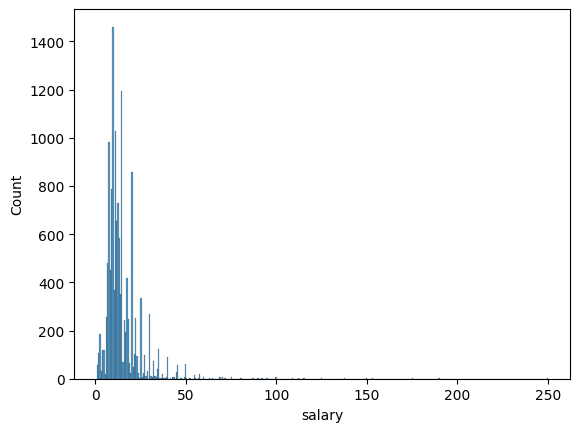

In [ ]:
sns.histplot(x=df['salary'])

Nhìn vào biểu đồ phân phố mức lương, có thể thấy rằng mức lương tập trung chủ yếu trong khoảng từ 1 đến 30 triệu. Những công việc có mức cao hơn 100 triệu/tháng cũng xuất hiện nhưng với tần xuất rất thấp. Mức lương phổ biến nhất là 10 triệu với 1183 bài tuyển dụng, tiếp đến là mức lương 15 triệu, 9 triệu và 20 triệu một tháng.

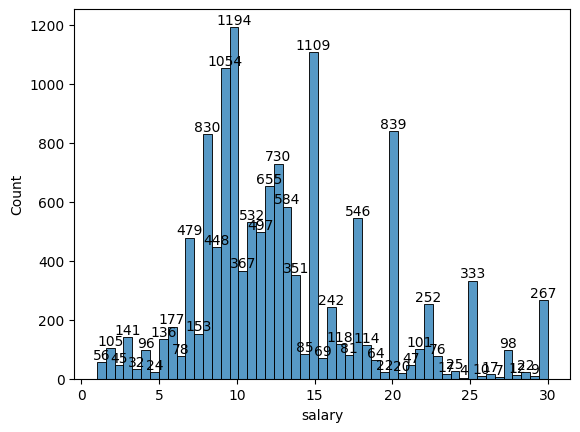

In [ ]:
ax=sns.histplot(x=df[df['salary']<=30]['salary'])
ax.bar_label(ax.containers[0]);

<Axes: xlabel='num_recruits', ylabel='Count'>

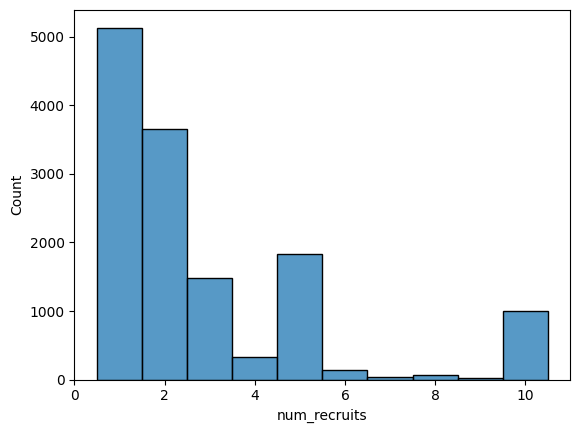

In [ ]:
sns.histplot(x=df[df['num_recruits']<=10]['num_recruits'], discrete=True)

<Axes: xlabel='num_recruits', ylabel='Count'>

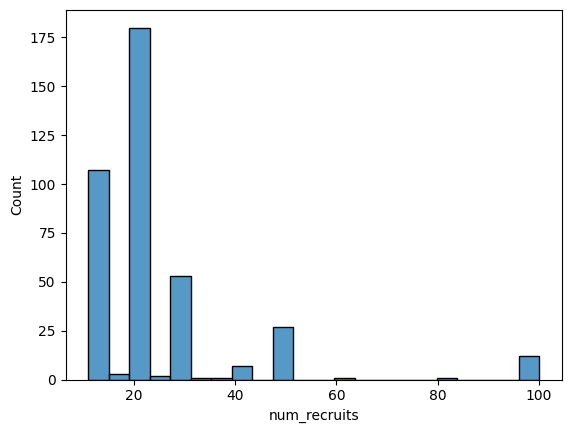

In [ ]:
sns.histplot(x=df[(df['num_recruits']>10) & (df['num_recruits']<=100)]['num_recruits'])

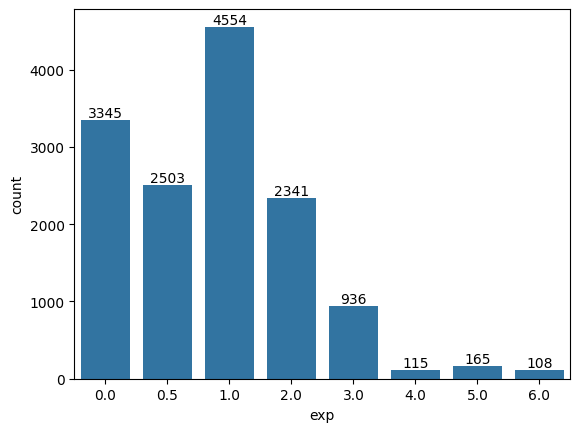

In [ ]:
ax = sns.countplot(x=df['exp'])
ax.bar_label(ax.containers[0]);

Trên trang web TopCV, bài tuyển dụng yêu cầu 1 năm kinh nghiệm chiếm số lượng nhiều nhất (4554), tiếp sau đó là những công việc không yêu cầu kinh nghiệm (3345). Những công việc yêu cầu từ 4 năm kinh nghiệm trở lên chiếm số lượng rất ít (388) chỉ khoảng 2.7% tổng số bài tuyển dụng. Điều này cho thấy xu hướng tuyển dụng trên nền tảng này chủ yếu tập chung vào những người không có quá nhiều kinh nghiệm.

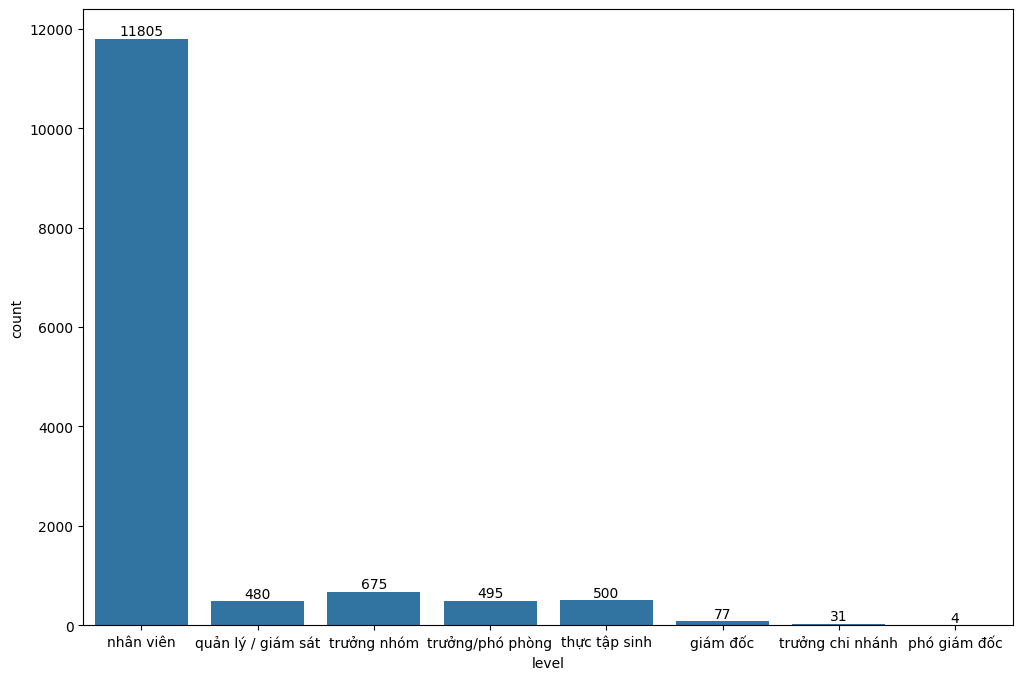

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x=df['level'])
ax.bar_label(ax.containers[0]);

Tuyển dụng nhân viên chiếm gần 85% số lượng bài tuyển dụng với 11805 công việc là tuyển nhân viên, tiếp theo đó là trưởng nhóm, thực tập sinh, trưởng/phó phòng, quản lý/giám sát với khoảng 5-600 bài tuyển dụng. Các chức vụ cao hơn, dánh cho người có nhiều kinh nghiệm hơn như giám đốc, phó giám đốc, trưởng chi nhánh có số lượng tuyển rất ít. Điều này hoàn toàn hợp lý vì trên biểu đồ thống kê theo kinh nghiệm ở trên, các công việc yêu cầu trên 4 năm kinh nghiệm cũng rất ít.

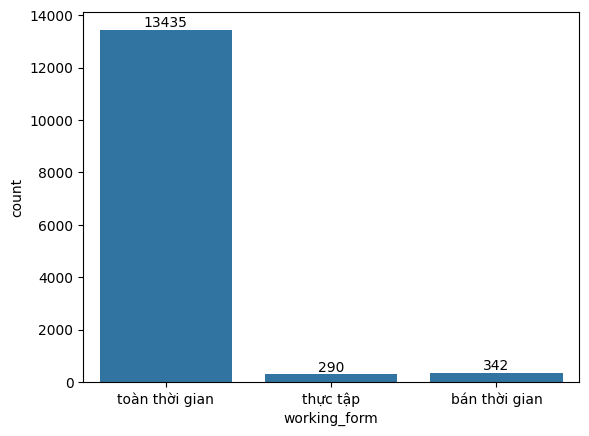

In [ ]:
ax = sns.countplot(x=df['working_form'])
ax.bar_label(ax.containers[0]);

Có thể thấy hầu hết các công ty ở Việt Nam đều muốn nhân viên của mình làm toàn thời gian với 95% các bài tuyển dụng đều yêu cầu làm việc toàn thời gian. Hai hình thức làm việc khác là thực tập và bán thời gian có số lượng tương đương nhau khoảng 300 bài tuyển dụng.

Những công việc có các yêu cầu khác như ngoại ngữ, giới tính chiếm tỉ lệ không cao. Đa số các công việc đều không yêu cầu về giới tính hay ngoại ngữ. Tuy nhiên, có thể thấy các công việc yêu cầu tiếng anh cao hơn hẳn so với toàn bộ các ngôn ngữ khác (trung, hàn, nhật,...), điều này cho thấy ứng viên học tiếng anh sẽ có lợi thế hơn so với các ứng viên học ngôn ngữ khác.

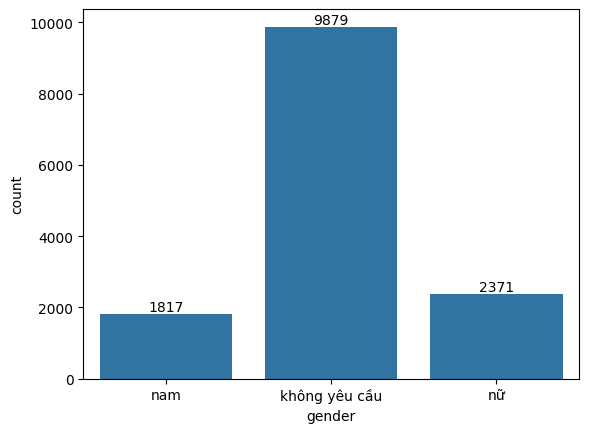

In [ ]:
ax = sns.countplot(x=df['gender'])
ax.bar_label(ax.containers[0]);

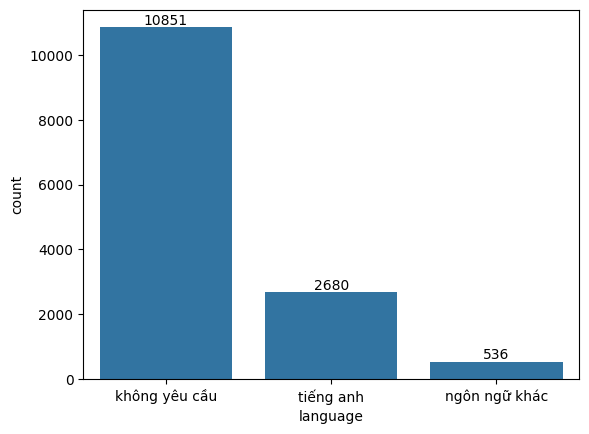

In [ ]:
ax = sns.countplot(x=df['language'])
ax.bar_label(ax.containers[0]);

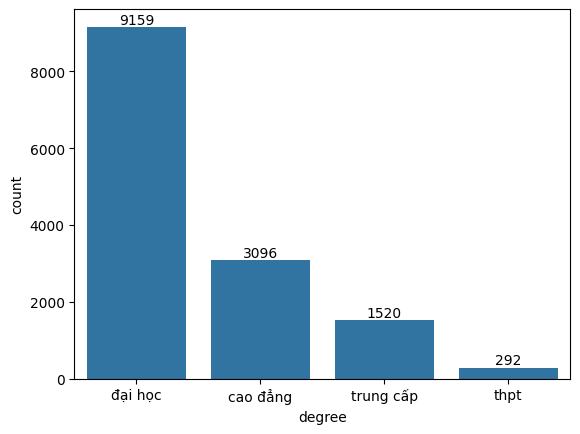

In [ ]:
ax = sns.countplot(x=df['degree'])
ax.bar_label(ax.containers[0]);

Về vấn đề bằng cấp, công việc yêu cầu ứng viên tối thiểu phải có bằng đại học chiếm đa số với 9159 bài tuyển dụng (65%), tiếp theo đó là yêu cầu tối thiểu bằng cao đẳng với 3096 bài tuyển dụng. Điều này cho thấy bằng cấp thực sự quan trọng trong khi tìm việc ở thị trường Việt Nam. Chỉ có rất ít công việc cho phép ứng viên sử dụng bằng trung cấp và thpt và không có công việc nào chấp nhận bằng thcs hay không có bằng cấp.

<Axes: xlabel='city'>

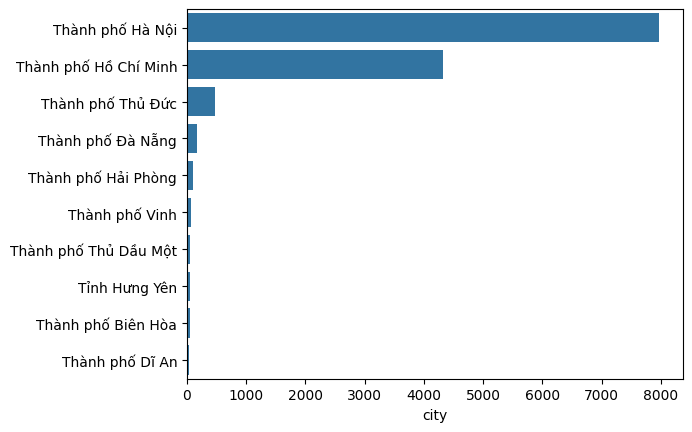

In [ ]:
city_count = df['city'].value_counts()
sns.barplot(city_count.head(10),orient = 'h')

Thông thường, 2 thành phố có nhiều việc làm nhất là Hà Nội và TP.HCM, dữ liệu trên nền tảng TopCV cũng không ngoài lệ. Số lượng việc làm ở Hà Nội là nhiều nhất và nhiều gấp 2 lần số lượng việc làm ở TP.HCM. Thành phố Thủ Đức (Bao gồm quận Thủ Đức, quận 2 và quận 9) có số lượng công việc nhiều thứ 3. Với chỉ 3 quận không phải trung tâm của TPHCM, lượng bài tuyển dụng của thành phố Thủ Đức lại nhiều hơn cả các thành phố đang phát triển mạnh như Đà Nẵng, Biên Hòa, Thủ Dầu Một.

<Axes: xlabel='district'>

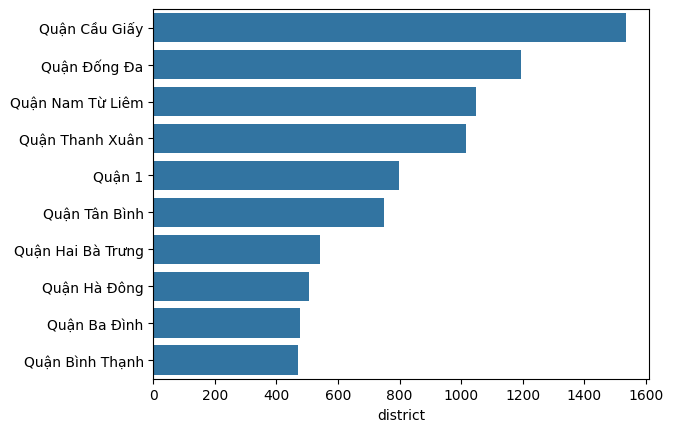

In [ ]:
district_count = df['district'].value_counts()
sns.barplot(district_count.head(10),orient = 'h')

## Bivariate analysis

In [ ]:
import plotly.express as px
px.box(x=df['exp'],y=df['salary'])

Boxplot trên biểu diễn tương quan giữa số năm kinh nghiệm và mức lương. Khi số năm kinh nghiệm tăng lên, mức lương trung bình cũng tăng theo. Đối với những công việc không yêu cầu kinh nghiệm, mức lương tập trung trong khoảng 7.5 - 15 triệu. Khi có được 1 năm kinh nghiệm, mức lương tăng lên từ 10 - 16 triệu và đạt cao nhất khi công việc yêu cầu nhiều kinh nghiệm nhất là 6 năm với mức lương trung bình là 32.5 triệu và tập trung trong khoảng 22.5 đến 40 triệu. Từ kết quả trên, có thể kết luận kinh nghiệm có ảnh hưởng tới mức lương đối với nhà tuyển dụng.

In [ ]:
px.box(x=df['level'],y=df['salary'])

Nhín vào biểu đồ trên, có thể thấy được thực tập sinh có mức lương trung bình thấp nhất, đây cũng là một điều dễ hiểu trong thị trường việc làm. Mức lương tăng lên với những công việc có vị trí cao hơn và giám đốc là vị trí có mức lương trung bình cao nhất. Mức lương của giám đốc tập trung trong khoảng 24.5 đến 46 triệu, mức lương này khá tương đồng với mức lương của những công việc yêu cầu 6 năm kinh nghiệm. Nhân viên có mức lương trung bình thấp thứ 2 chỉ cao hơn thức tập sinh nhưng lại chứa rất nhiều outlier. Những outlier này có mức lương lên đến hơn 100 triệu/tháng, đây là một mức lương rất cao đối với một công việc ở Việt Nam hoặc cũng có thể là typo/lừa đảo. Tương tự đối với thực tập sinh cũng có một số công việc có mức lương cao một cách bất thường.

In [ ]:
px.box(x=df['company_type'],y=df['salary'])

Nhìn vào biểu đồ trên, có thể thấy rằng gần như không có sự khác nhau giữa các loại hình công ty về lương trung bình, IQR và Outlier. Có thể kết luận rằng loại hình công ty không ảnh hưởng tới lương.

<Axes: xlabel='num_recruits', ylabel='salary'>

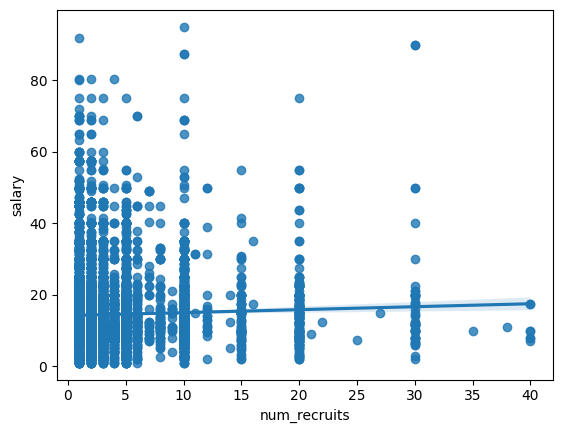

In [ ]:
sns.regplot(x='num_recruits', y='salary', data=df[(df['salary']<100) & (df['num_recruits']<50)])

Scatterplot biểu diễn sự tương quan giữa sự tương quan giữa số lượng tuyển và lương. Đường hồi quy tuyến tính gần như là song song với trục x, có nghĩa là khi giá trị của biến số lượng tuyển tăng lên thì giá trị của biến lương gần như không thay đổi. Chứng tỏ một bài tuyển dụng tuyển ít hay nhiều người cũng không ánh hương đến mức lương.

In [ ]:
px.box(x=df['gender'], y=df['salary'])

Mức lương theo yêu cầu giới tính trong các bài tuyển dụng không có sự chênh lệch nhiều. Những công việc không yêu cầu giới tính có số lượng tuyển dụng nhiều nhất và cũng có mức lương cao nhất tập trung trong khoảng 10 đến 18 triệu. Những công việc yêu cầu giới tính là nữ mặc dù có số lượng tuyển nhiều hơn nam tuy nhiên lại có mức lương trung bình thấp hơn những công việc yêu cầu giới tính là nam.

In [ ]:
px.box(x=df['language'], y=df['salary'])

Những công việc không yêu cầu về ngoại ngữ mặc dù có số lượng bài tuyển dụng nhiều nhất nhưng lại có mức lương trung bình thấp nhất. Những công việc yêu cầu tiếng Anh hoặc các ngoại ngữ khác có mức lương tập trung trong khoảng 10 đến 20 triệu. Có thể thấy rằng những người học các ngoại ngữ không phải tiếng Anh mặc dù có số lượng công việc ít hơn nhưng mức lương sẽ không thấp hơn so với tiếng Anh.

In [ ]:
px.box(x=df['degree'], y=df['salary'])

Có thể thấy những công việc yêu cầu bằng cấp cao hơn sẽ có mức lương trung bình cao hơn.

## ANOVA and Kendalltau

ANOVA và Kendalltau thường được dùng để để kiểm định có sự tương quan giữa các các biến input là dạng phân loại với biến output dạng số (salary) hay không

In [ ]:
#Null Hypothesis: There is no significant association between predictor variables and target variables
#Alternate Hypothesis: There is a significant association between predictor variables and target variables

In [ ]:
from sklearn.feature_selection import f_classif
ANOVA, p_value = zip(*[f_classif(df[['salary']], df[cols]) for cols in cate_cols])
ANOVA_values = [result[0] for result in ANOVA]
p_value_values = [result[0] for result in p_value]
df_ANOVA = pd.DataFrame({'feaute':cate_cols,"ANOVA":ANOVA_values, "p_value":p_value_values})

In [ ]:
df_ANOVA.sort_values(by='ANOVA', ascending=False)

feaute       ANOVA        p_value
2  category_type  455.352128  2.411267e-192
4          level  409.025116   0.000000e+00
0            exp  327.629366   0.000000e+00
3   working_form  280.440454  3.733917e-120
5         gender  108.675847   1.457705e-47
7       language   75.851659   1.715703e-33
6         degree   57.311238   8.146321e-37
8             BH   11.540339   6.829085e-04
9   company_type   11.266141   2.227318e-07
1  num_other_job    9.861483   7.007530e-11

In [ ]:
from scipy.stats import kendalltau
res, p_value = zip(*[kendalltau(df[['salary']], df[cols]) for cols in cate_cols])
df_kendalltau = pd.DataFrame({'feaute':cate_cols,"kendalltau":res, "p_value":p_value})

In [ ]:
df_kendalltau.sort_values(by='kendalltau', ascending=False)

feaute  kendalltau        p_value
0            exp    0.310716   0.000000e+00
3   working_form    0.235293  2.729846e-249
7       language    0.095331   2.570774e-43
4          level    0.082457   8.427657e-34
8             BH    0.075219   8.131552e-27
2  category_type    0.067727   2.054641e-23
6         degree    0.060682   2.003012e-19
1  num_other_job    0.055640   2.654583e-19
9   company_type   -0.029184   1.369911e-05
5         gender   -0.119415   1.954407e-69

Kết quả cho thấy p_value của cả 2 thuật toán đều nhỏ hơn mức ý nghĩa 0.05 và rất gần với 0, vì vậy để xác định được thuộc tính nào thực sự ảnh hưởng đến biến salary cần phải dùng đến giá trị ANOVA và kendalltau.
 - Với ANOVA, giá trị ANOVA càng cao thì biến đó được coi là càng ảnh hưởng đến biến mục tiêu. Các thuộc tính như category_type, level, exp, working_form và gender có chỉ số ANOVA cao nhất sẽ được xem là có ảnh hưởng hơn đến lương. Còn các thuộc tính như BH, company_type hay num_other_job có ANOVA thấp hơn hắn so với các thuộc tính khác nên sẽ được xem là không ảnh hưởng nhiều đến lương. Điều này tương đồng với kết quả phân tích đa biến ở trên.
 - Với Kendalltau, giá trị kendalltau càng gần -1 và 1 thì sẽ tương quan cao với biến lương còn giá trị càng gần 0 thì sẽ càng không liên quan tới biến lương. Các biến có độ ảnh hưởng cao là exp, working_form, gender, language và level và các biến company_type, num_other_job, degree, category_type có độ ảnh hưởng thấp hơn.

Như vậy, những thuộc tính như exp, working_form, level là những thuộc tính quan trọng nhất vì luôn có chỉ số ANOVA và kendalltau cao hơn. Còn thuộc tính company_type và num_other_job có thể được coi như 2 thuộc tính dư thừa vì luôn có chỉ sô ANOVA và Kendalltau thấp, 2 thuộc tính này có thể được bỏ đi nếu dùng bộ dữ liệu này cho các mô hình hồi quy/phân lớp.